# EXPLORATORY DATA ANALYSIS - RETAIL SUPERSTORE

### Done by - Dilpreet Kaur 
### The Sparks Foundation

In [10]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("file:////Users/dilpreetkaur/Downloads/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [12]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [13]:
df.shape

(9994, 13)

In [14]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [16]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [17]:
df.duplicated().sum()

17

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(9977, 13)

In [21]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [22]:
df.nunique()

#So, from the output we can say that the data belongs to one country
#United States with 4 Region, 49 State and 531 City and as for the product data,
#there are 3 Segment, 3 Category, 17 Sub-Category, and 4 Ship Mode





Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [23]:
best_selling = df.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum()
best_selling

,Sales,Profit,Quantity
Category,,,
Furniture,741306.3133,18421.8137,8020
Office Supplies,718735.2440,122364.6608,22861
Technology,836154.0330,145454.9481,6939


<AxesSubplot:xlabel='Category', ylabel='Sales'>

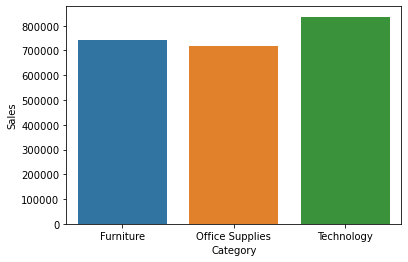

In [24]:
sns.barplot(x=best_selling.index,y=best_selling.Sales)


<AxesSubplot:xlabel='Category', ylabel='Profit'>

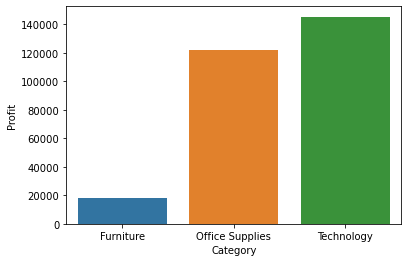

In [25]:
sns.barplot(x=best_selling.index,y=best_selling.Profit)


<AxesSubplot:xlabel='Category', ylabel='Quantity'>

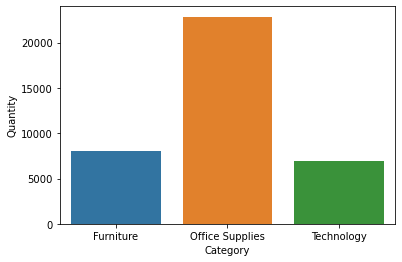

In [26]:
sns.barplot(x=best_selling.index,y=best_selling.Quantity)


In [27]:
subcategory_q = df.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False)
subcategory_q


,Quantity
Sub-Category,
Binders,5971
Paper,5144
Furnishings,3560
Phones,3289
Storage,3158
Art,2996
Accessories,2976
Chairs,2351
Appliances,1729


<AxesSubplot:xlabel='Quantity', ylabel='Sub-Category'>

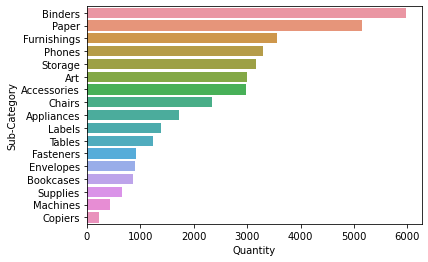

In [28]:
sns.barplot(data = subcategory_q,x = subcategory_q.Quantity, y = subcategory_q.index)

In [29]:
s = df.groupby(['Sub-Category'])[['Sales', 'Profit']].sum()
ss = s.sort_values('Sales', ascending = False)
ss

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203409.1690,30228.0003
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [30]:
sp=s.sort_values('Profit', ascending = False)
sp


,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78224.1420,33944.2395
Binders,203409.1690,30228.0003
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91683.0240,13052.7230


<function matplotlib.pyplot.show(close=None, block=None)>

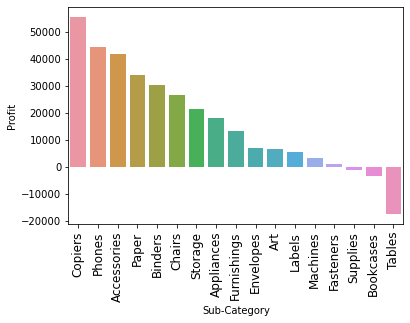

In [31]:
sns.barplot(data = sp, x = sp.index, y = sp.Profit)
plt.xticks(rotation = "vertical", size = 12)
plt.show

In [32]:
cs = df.groupby(['City'])[['Sales', 'Quantity']].sum().sort_values('Sales',ascending = False)
cs

,Sales,Quantity
City,,
New York City,256319.041,3413
Los Angeles,175831.901,2876
Seattle,119460.282,1578
San Francisco,112577.172,1920
Philadelphia,109061.461,1978
...,...,...
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1


<AxesSubplot:xlabel='Sales', ylabel='City'>

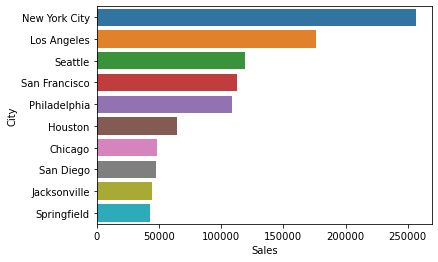

In [33]:
high=cs[:10]
high
sns.barplot(data=high,y=high.index, x=high.Sales)

<AxesSubplot:xlabel='Sales', ylabel='City'>

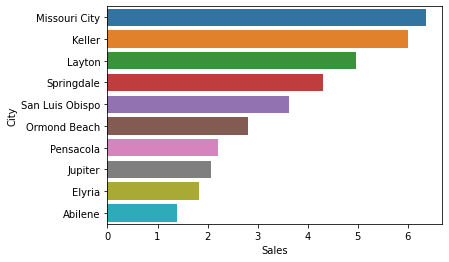

In [34]:
low=cs[-10:]
low
sns.barplot(data=low ,y=low.index, x=low.Sales)

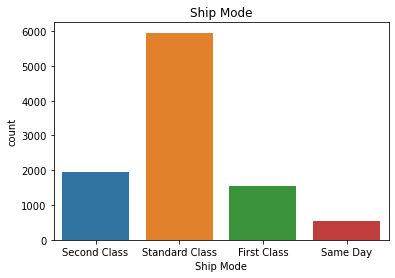

In [56]:
sns.countplot(data=df, x="Ship Mode")
plt.title("Ship Mode")
plt.show()

<AxesSubplot:>

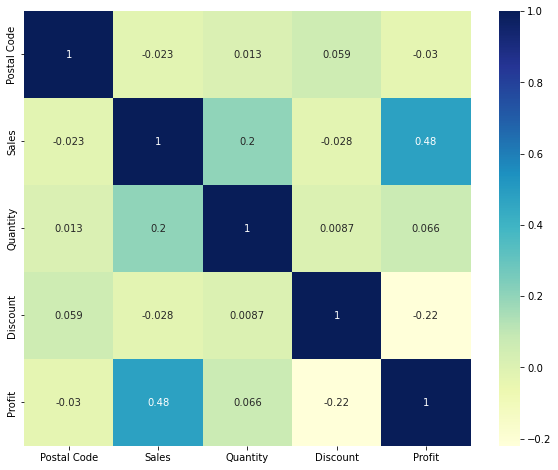

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

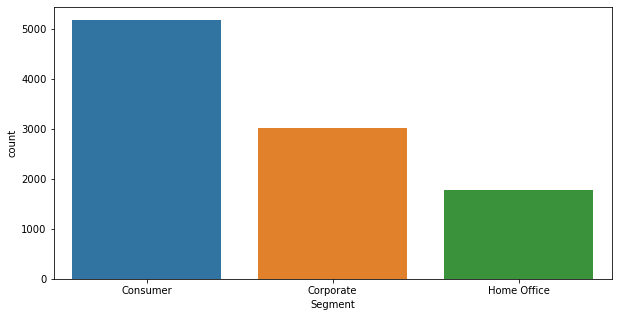

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.Segment)
plt.show()

In [37]:
l=df['Profit']<0
losses= df[l]
losses

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772


In [38]:
losses.shape

(1869, 13)

In [39]:
total_loss= np.negative(losses['Profit'].sum())
print("Total loss = %.2f" %total_loss)


Total loss = 156112.99


In [40]:
u=losses.groupby(['Sub-Category'])[['Sales', 'Quantity','Discount','Profit']].sum()
u.sort_values('Profit', ascending = True)

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Binders,36137.0490,2453,451.60,-38504.2594
Tables,104978.5460,757,74.15,-32412.1483
Machines,72456.2530,157,25.60,-30118.6682
Bookcases,48072.7408,422,37.99,-12152.2060
Chairs,91707.0840,874,61.10,-9868.7825
Appliances,3382.5340,235,53.60,-8629.6412
Phones,35797.8400,476,46.60,-7530.6235
Furnishings,12845.8440,597,88.60,-6490.9134
Storage,37869.0720,569,32.20,-6426.3038


In [42]:
v=losses.groupby(['City']).sum().sort_values('Profit',ascending=True).head(10)
v


,Postal Code,Sales,Quantity,Discount,Profit
City,,,,,
Philadelphia,4783713,70460.5510,892,115.30,-19590.7411
Houston,14256474,37640.7304,683,104.14,-14785.3668
Chicago,9336839,19906.4480,538,87.40,-11114.3901
San Antonio,2580831,17395.1450,139,17.10,-7831.0254
Lancaster,683904,7699.2420,71,9.40,-7632.4946
Burlington,108868,12044.8740,19,2.00,-5999.3318
Dallas,5487794,9994.0562,280,39.30,-4208.5218
Jacksonville,1237176,31146.2710,154,18.85,-4059.9857
New York City,400828,19533.8020,132,12.20,-3966.0226


In [46]:
losses.groupby(by='Category').mean().sort_values(['Sales'],ascending=False)

,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,
Technology,50287.590406,439.899974,3.553506,0.333579,-142.361322
Furniture,59724.009818,361.296234,3.716690,0.367237,-85.447476
Office Supplies,54739.381921,103.508600,3.866667,0.617401,-63.964996
